<a href="https://colab.research.google.com/github/sauravakolia/Object-Detection-Of-Cartoons-Character/blob/master/Yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cloning the darknet Repository
Setting the value of GPU abd CUDA to 1**

In [0]:
#Cloning the darknet Repository
#Setting the value of GPU abd CUDA to 1

!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 13229 (delta 1), reused 2 (delta 0), pack-reused 13221
Receiving objects: 100% (13229/13229), 11.92 MiB | 6.45 MiB/s, done.
Resolving deltas: 100% (9044/9044), done.
/content/darknet


In [0]:
#Checking the version
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
#importing the google drive
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Preparing The Model**

In [0]:
#Compiling the model
# !make &> compile.log
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [0]:
#For showing the prediction 

import matplotlib.pyplot as plt
import cv2
import os

def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

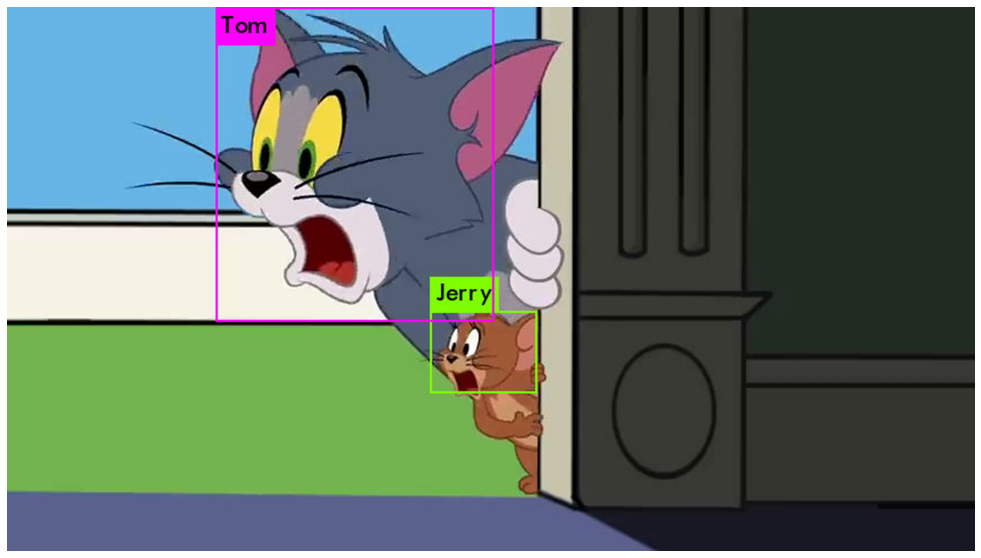

In [0]:
predictImage('prediction.png')

In [0]:
#for saving the compiling model to drive
# !cp ./darknet /content/gdrive/My\ Drive/darknet/bin/

In [0]:
# Uncomment if you want to use Symbolic link
!ln -s /content/gdrive/My\ Drive/darknet/ /darknet
!ls /darknet                                                                                 

ln: failed to create symbolic link '/darknet/darknet': Operation not supported
backup		  img		      sad	   testresult.txt   weights
bin		  labels	      sart.txt	   test.txt	    WinToLin.py
cfg		  mt.txt	      sresult.txt  trainp.txt	    yolov3.cfg
cuDNN		  newtrainresult.txt  s.txt	   trainresult.txt
d.mp4		  obj.data	      tess.txt	   train.txt
ImageFormater.py  obj.names	      testp.txt    unknown


In [0]:
#for copying the images to darknet folder
!cp -r "/darknet/img" ./data/obj                          

In [0]:
#For downloading the pretrained weights
# !wget https://pjreddie.com/media/files/darknet53.conv.74                                                                                      

In [0]:
#For moving names and data file to data direcory
!cp /darknet/obj.names ./data
!cp /darknet/obj.data  ./data

In [0]:
#For copying the train and test file to data directory
!cp /darknet/train.txt ./data   
!cp /darknet/test.txt ./data               

In [0]:
#For copying the train and test file to data directory
!cp /darknet/trainp.txt ./data   
!cp /darknet/testp.txt ./data               

In [0]:
!cp /darknet/cfg/yolov3_custom.cfg ./cfg

In [0]:
# !cp darknet53.conv.74 /darknet/weights/

In [0]:
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  train.txt
coco9k.map  goal.txt		      obj		scream.jpg  voc.names
coco.names  horses.jpg		      obj.data		testp.txt
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	trainp.txt


**Training**

In [0]:
# train your custom detector
!./darknet detector train data/obj.data /content/gdrive/My\ Drive/darknet/cfg/yolov3_custom.cfg /content/gdrive/My\ Drive/darknet/backup/yolov3_custom_3000.weights -dont_show


**Model Comparision**

In [0]:
!./darknet detector map data/obj.data /darknet/cfg/yolov3_custom.cfg  /darknet/backup/yolov3_custom_4000.weights


In [0]:
!./darknet detector map data/obj.data /darknet/cfg/yolov3_custom.cfg  /darknet/backup/yolov3_custom_3000.weights


In [0]:
!./darknet detector map data/obj.data /darknet/cfg/yolov3_custom.cfg  /darknet/backup/yolov3_custom_2000.weights


In [0]:
!./darknet detector map data/obj.data /darknet/cfg/yolov3_custom.cfg  /darknet/backup/yolov3_custom_1000.weights


**Testing**

In [0]:
# need to set our custom cfg to test mode 
# %cd cfg
# !sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
# !sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
# %cd ..
import os
os.getcwd()

'/content/darknet/darknet'

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64

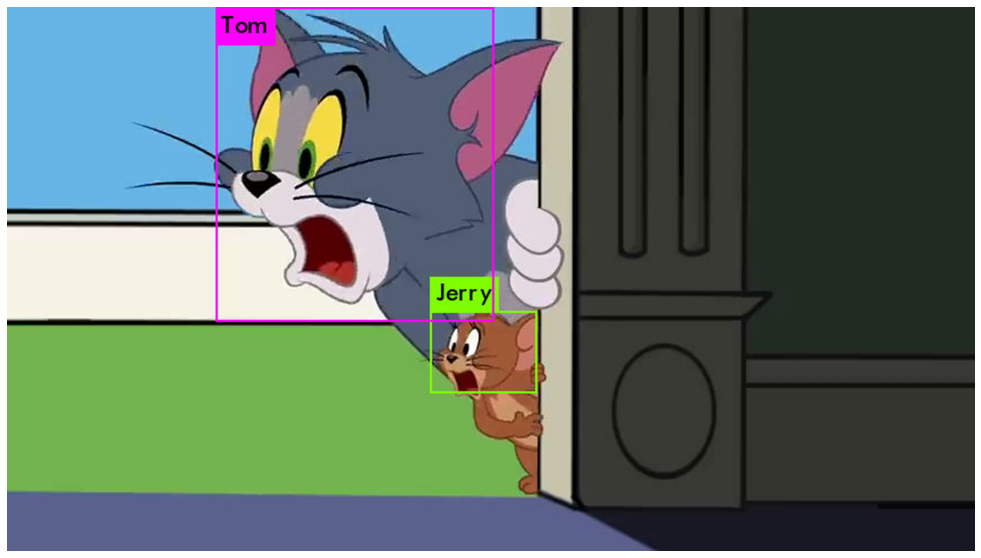

In [0]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg  /darknet/backup/yolov3_custom_last.weights /darknet/img/f165.png -dont_show -thresh 0.3
predictImage('predictions.jpg')             

In [0]:
#for getting predictions in batches                                                                          -dont_show < data/train.txt > result.txt
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg  /darknet/backup/yolov3_custom_final.weights -dont_show -ext_output < /darknet/s.txt > risk.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128 

In [0]:
# !cp /content/darknet/risk.txt /darknet/          

In [0]:
#for getting predictions on video
!./darknet detector demo  data/obj.data cfg/yolov3_custom.cfg  /darknet/backup/yolov3_custom_last.weights /darknet/d.mp4 -dont_show -out_filename res.mp4 -thresh 0.3